# Polydata Demo
---

In [139]:
import polydata
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from itertools import combinations

colors = np.array(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])
features = ['x', 'y', 'z', 'w']
classes = ['p1', 'p2', 'p3', 'p4', 'p5']
random_state = 6

## The `make_poly` function
---

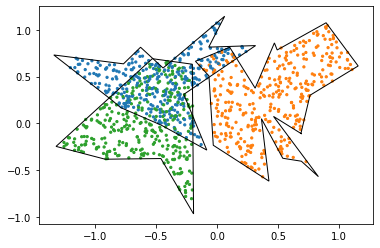

In [140]:
X, y, polygons, centers = polydata.make_poly(
    n_samples = 1000,
    n_poly = 3,
    dimension = 2,
    min_center_distance = 0.5,
    min_radius= 0.0,
    max_radius = 1.0,
    outside = 0.0,
    distribution = None,
    std = 1.0,
    centers = None,
    bounding_box = (-0.5, 0.5),
    random_state = random_state
)

ppatches = [patches.PathPatch(p, facecolor='None') for p in polygons]
fig, ax = plt.subplots()
for ppatch in ppatches:
    ax.add_patch(ppatch)
ax.scatter(X[:,0], X[:,1], s=5, c=colors[y])
ax.autoscale_view()
plt.show()

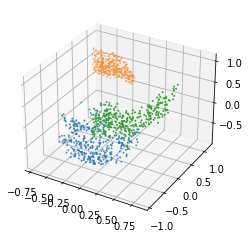

In [141]:
dim = 3
X_3d, y_3d, polygons_3d, centers_3d = polydata.make_poly(1000, 3, dim, bounding_box=(-1.0,1.0), random_state = random_state)

ax_3d = plt.axes(projection='3d')
ax_3d.scatter(X_3d[:,0], X_3d[:,1], X_3d[:,2], s=1, c=colors[y_3d])
plt.show()

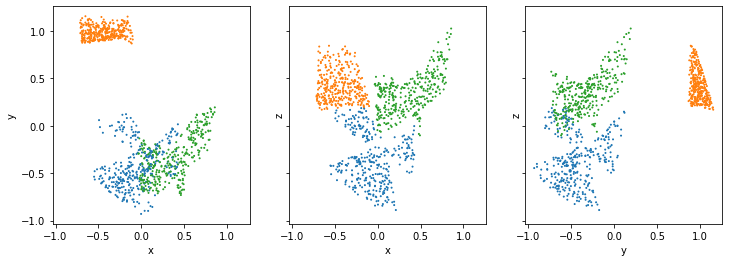

In [142]:
fig, axes = plt.subplots(1, dim, sharex=True, sharey=True, figsize=(12, 4))
for ((i,j), k) in zip(combinations(range(dim), 2), range(dim)):
    axes[k].scatter(X_3d[:,i], X_3d[:,j], s=1, c=colors[y_3d])
    axes[k].set_xlabel(features[i])
    axes[k].set_ylabel(features[j])
plt.show()

## Calculating and controlling overlap
---

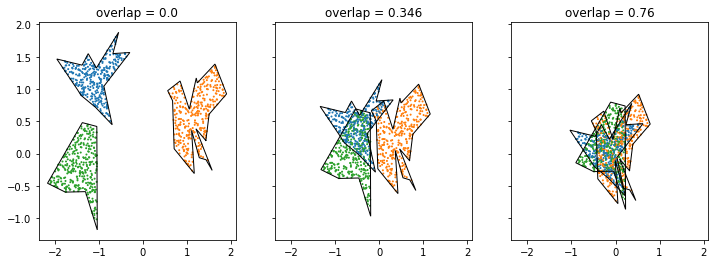

In [143]:
X_high_overlap, p_high_overlap = polydata.make_overlap(X, y, polygons, min_overlap = .7, max_overlap = .8)
X_no_overlap, p_no_overlap = polydata.make_overlap(X, y, polygons, min_overlap = 0.0, max_overlap = 0.0)

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 4))

axes[0].title.set_text('overlap = ' + str(polydata.compute_overlap(X_no_overlap, p_no_overlap)))
axes[0].scatter(X_no_overlap[:,0], X_no_overlap[:,1], s=1, c=colors[y])
for p in p_no_overlap:
    axes[0].add_patch(patches.PathPatch(p, facecolor='None'))

axes[1].title.set_text('overlap = ' + str(polydata.compute_overlap(X, polygons)))
axes[1].scatter(X[:,0], X[:,1], s=1, c=colors[y])
for p in polygons:
    axes[1].add_patch(patches.PathPatch(p, facecolor='None'))

axes[2].title.set_text('overlap = ' + str(polydata.compute_overlap(X_high_overlap, p_high_overlap)))
axes[2].scatter(X_high_overlap[:,0], X_high_overlap[:,1], s=1, c=colors[y])
for p in p_high_overlap:
    axes[2].add_patch(patches.PathPatch(p, facecolor='None'))

plt.show()

## Making correlated features
---

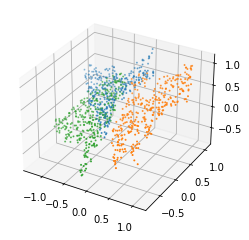

In [144]:
X_new = polydata.make_correlated_features(X, noise=.05, random_state=1)
ax = plt.axes(projection='3d')
ax.scatter(X_new[:,0], X_new[:,1], X_new[:,2], s=1, c=colors[y])
plt.show()